Curso de coursera con algunas modificaciones obtenidas en el máster de datahack 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
# carga datos
from keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
#.....
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


Digit class: 5


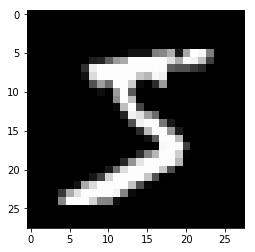

In [5]:
plt.imshow(x_train[0], 'gray')
print("Digit class:", y_train[0])

In [6]:
X_train = x_train.astype('float32') / 255

X_test = x_test.astype('float32') / 255

In [7]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10) # We have 10 classes to codify

Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
# creamos modelo
model = Sequential()

In [9]:
# añadimos capas
model.add(Dense(256,activation='sigmoid',input_shape=(784,)))

# capa de salida
model.add(Dense(10,activation='softmax'))

In [10]:
# compilamos modelo con funcion de perdida y optimizador
model.compile(loss='categorical_crossentropy'
              ,optimizer=SGD(),metrics=['accuracy'])


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train, Y_train,batch_size=128, 
          epochs=10, validation_data=(X_test,Y_test))

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (60000, 28, 28)

Tenemos que redimensionar para solucionar el error que nos da

In [13]:
trainvectors = X_train.reshape(60000, 784)
testvectors  = X_test.reshape(10000, 784)

In [14]:
# entrenamos red

model.fit(
    trainvectors,   # entrenamiento
    Y_train,        # etiquetas 
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20,      # Number of epochs to run the optimizer algorithm
    verbose=1       # Level of verbosity of the log messages
)


Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 1.9878 - acc: 0.5569
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 1.4611 - acc: 0.7472
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.1041 - acc: 0.7969
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.8891 - acc: 0.8245
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.7576 - acc: 0.8404
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.6714 - acc: 0.8502
Epoch 7/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.6111 - acc: 0.8585
Epoch 8/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.5665 - acc: 0.8646
Epoch 9/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.5324 - acc: 0.8699
Epoch 10/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.5053 - acc: 0.8739

In [15]:
preds = model.predict_classes(testvectors)

Veamos como saber el resultado 

Real class 7 predicted class 7


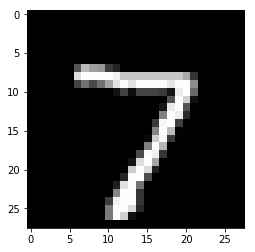

In [17]:
plt.imshow(X_test[0], 'gray')
print("Real class", y_test[0], "predicted class", preds[0])

In [24]:
resultados = model.predict(testvectors)

In [25]:
resultados

array([[  3.64496023e-04,   1.03613465e-05,   1.50417152e-04, ...,
          9.93438542e-01,   4.60902629e-05,   4.39141737e-03],
       [  1.95054598e-02,   1.28989446e-03,   7.61536598e-01, ...,
          7.15812575e-06,   1.23665407e-02,   1.61032658e-05],
       [  9.28159498e-05,   9.56961632e-01,   1.40343858e-02, ...,
          7.41983997e-03,   4.81646601e-03,   2.03917222e-03],
       ..., 
       [  2.86074519e-05,   1.80397343e-04,   2.15925465e-04, ...,
          6.04991755e-03,   3.11621819e-02,   1.48593575e-01],
       [  1.84670947e-02,   1.46933878e-02,   3.96928098e-03, ...,
          3.64371459e-03,   3.66629183e-01,   4.45185183e-03],
       [  2.20540911e-03,   1.03100911e-06,   3.75605258e-03, ...,
          4.58298757e-07,   8.15772655e-05,   1.04710971e-05]], dtype=float32)